# **HI-SEAS Solar Irradiance Prediction**

## **Dataset**
Taken from Space Apps 2017's "You are my Sunshine" challenge<sup>1</sup>, the dataset contains meteorological data from the HI-SEAS Habitat in Hawaii. In particular the dataset includes observations of:

- Solar Irradiance (W/m<sup>2</sup>)
- Temperature (&deg;F)
- Barometric Pressure (Hg)
- Humidity (%)
- Wind Direction (&deg;)
- Wind Speed (mph)
- Sun Rise/Set Time

## **Aim**
 To accurately model solar irradiance from other meteorological parameters contained within the dataset.

1 - https://2017.spaceappschallenge.org/challenges/earth-and-us/you-are-my-sunshine/details

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing Required Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## **Importing The Dataset**
For visualization of dataset and its values

In [7]:
dataset = pd.read_csv('./drive/MyDrive/Colab Notebooks/SolarPrediction.csv')
dataset = dataset.sort_values(['UNIXTime'], ascending = [True])
dataset.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
7416,1472724008,9/1/2016 12:00:00 AM,00:00:08,2.58,51,30.43,103,77.27,11.25,06:07:00,18:38:00
7415,1472724310,9/1/2016 12:00:00 AM,00:05:10,2.83,51,30.43,103,153.44,9.00,06:07:00,18:38:00
7414,1472725206,9/1/2016 12:00:00 AM,00:20:06,2.16,51,30.43,103,142.04,7.87,06:07:00,18:38:00
7413,1472725505,9/1/2016 12:00:00 AM,00:25:05,2.21,51,30.43,103,144.12,18.00,06:07:00,18:38:00
7412,1472725809,9/1/2016 12:00:00 AM,00:30:09,2.25,51,30.43,103,67.42,11.25,06:07:00,18:38:00


## **Feature Engineering**
First step upon importing the dataset was to convert time and date parameters into a more useful format and add some coloumns that may be useful for visualisation, modelling and analysis.

This include the following operations:

    - converting one time and one date column to more useful columns
    - dropping unnecessary columns
    

In [8]:
from datetime import datetime
from pytz import timezone
import pytz
hawaii= timezone('Pacific/Honolulu')
dataset.index =  pd.to_datetime(dataset['UNIXTime'], unit='s')
dataset.index = dataset.index.tz_localize(pytz.utc).tz_convert(hawaii)
dataset['MonthOfYear'] = dataset.index.strftime('%m').astype(int)
dataset['DayOfYear'] = dataset.index.strftime('%j').astype(int)
dataset['WeekOfYear'] = dataset.index.strftime('%U').astype(int)
dataset['TimeOfDay(h)'] = dataset.index.hour
dataset['TimeOfDay(m)'] = dataset.index.hour*60 + dataset.index.minute
dataset['TimeOfDay(s)'] = dataset.index.hour*60*60 + dataset.index.minute*60 + dataset.index.second
dataset['TimeSunRise'] = pd.to_datetime(dataset['TimeSunRise'], format='%H:%M:%S')
dataset['TimeSunSet'] = pd.to_datetime(dataset['TimeSunSet'], format='%H:%M:%S')
dataset['DayLength(s)'] = dataset['TimeSunSet'].dt.hour*60*60 \
                           + dataset['TimeSunSet'].dt.minute*60 \
                           + dataset['TimeSunSet'].dt.second \
                           - dataset['TimeSunRise'].dt.hour*60*60 \
                           - dataset['TimeSunRise'].dt.minute*60 \
                           - dataset['TimeSunRise'].dt.second
dataset.drop(['Data','Time','TimeSunRise','TimeSunSet'], inplace=True, axis=1)
dataset.head(10)

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,MonthOfYear,DayOfYear,WeekOfYear,TimeOfDay(h),TimeOfDay(m),TimeOfDay(s),DayLength(s)
UNIXTime,,,,,,,,,,,,,,
2016-09-01 00:00:08-10:00,1472724008,2.58,51,30.43,103,77.27,11.25,9,245,35,0,0,8,45060
2016-09-01 00:05:10-10:00,1472724310,2.83,51,30.43,103,153.44,9.00,9,245,35,0,5,310,45060
2016-09-01 00:20:06-10:00,1472725206,2.16,51,30.43,103,142.04,7.87,9,245,35,0,20,1206,45060
2016-09-01 00:25:05-10:00,1472725505,2.21,51,30.43,103,144.12,18.00,9,245,35,0,25,1505,45060
2016-09-01 00:30:09-10:00,1472725809,2.25,51,30.43,103,67.42,11.25,9,245,35,0,30,1809,45060
2016-09-01 00:45:04-10:00,1472726704,2.15,51,30.43,103,67.85,4.50,9,245,35,0,45,2704,45060
2016-09-01 00:50:06-10:00,1472727006,2.07,51,30.43,103,156.58,1.12,9,245,35,0,50,3006,45060
2016-09-01 00:55:04-10:00,1472727304,2.06,52,30.43,103,69.98,7.87,9,245,35,0,55,3304,45060
2016-09-01 01:00:07-10:00,1472727607,2.10,52,30.43,103,92.15,4.50,9,245,35,1,60,3607,45060


In [10]:
dataset['DayLength(s)'] = (dataset['DayLength(s)'] - dataset['DayLength(s)'].mean())\
/ dataset['DayLength(s)'].std()

DayLength(s) was an outlier so it is standardized using mean normalization method

In [11]:
dataset.head()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,MonthOfYear,DayOfYear,WeekOfYear,TimeOfDay(h),TimeOfDay(m),TimeOfDay(s),DayLength(s)
UNIXTime,,,,,,,,,,,,,,
2016-09-01 00:00:08-10:00,1472724008,2.58,51,30.43,103,77.27,11.25,9,245,35,0,0,8,2.019612
2016-09-01 00:05:10-10:00,1472724310,2.83,51,30.43,103,153.44,9.00,9,245,35,0,5,310,2.019612
2016-09-01 00:20:06-10:00,1472725206,2.16,51,30.43,103,142.04,7.87,9,245,35,0,20,1206,2.019612
2016-09-01 00:25:05-10:00,1472725505,2.21,51,30.43,103,144.12,18.00,9,245,35,0,25,1505,2.019612
2016-09-01 00:30:09-10:00,1472725809,2.25,51,30.43,103,67.42,11.25,9,245,35,0,30,1809,2.019612


## **Feature Visualisation**
Next, in order to get a better understanding of the data, hourly and monthly means of several variables were visualised using bar plots.

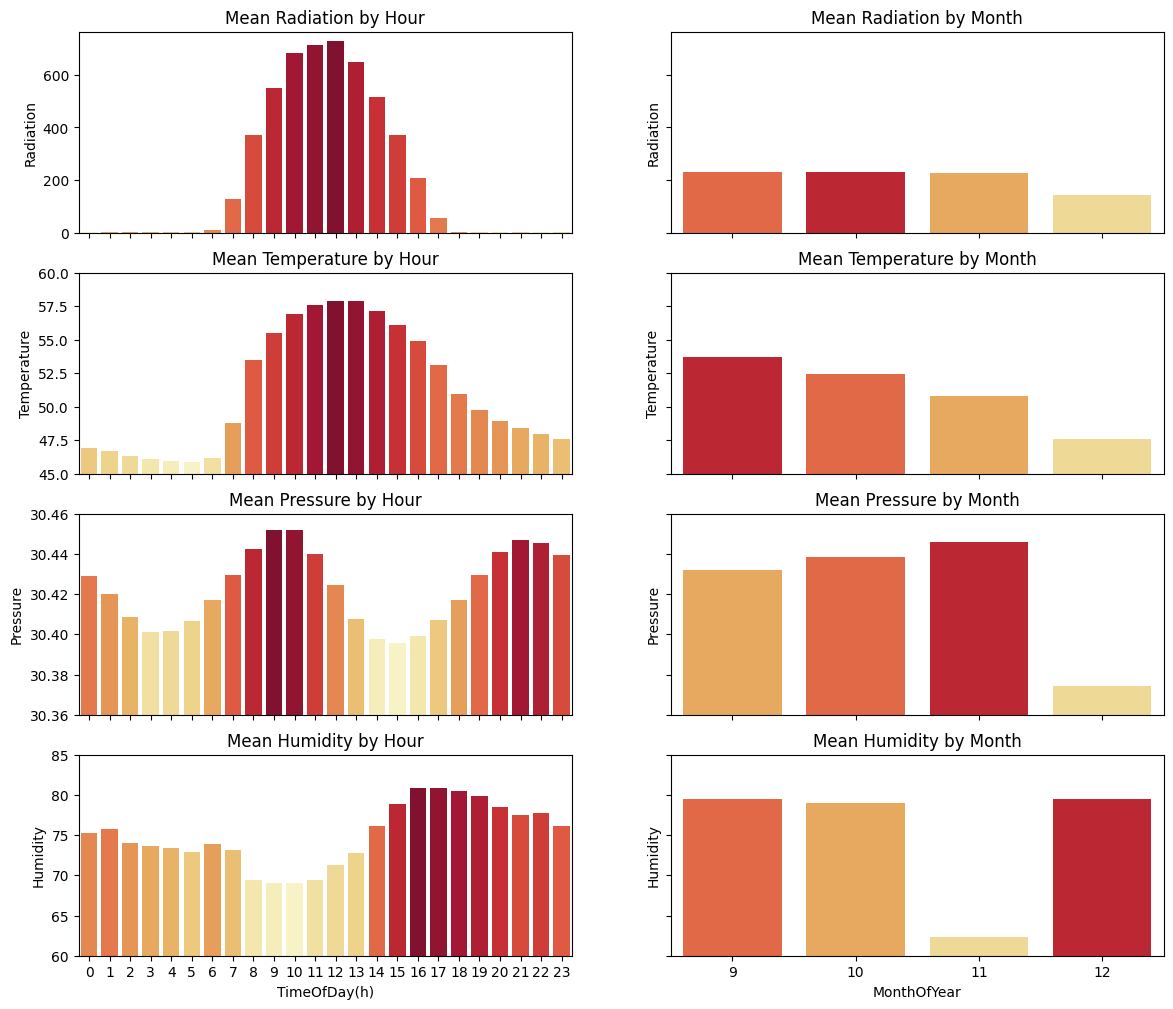

In [ ]:
grouped_m=dataset.groupby('MonthOfYear').mean().reset_index()
grouped_w=dataset.groupby('WeekOfYear').mean().reset_index()
grouped_d=dataset.groupby('DayOfYear').mean().reset_index()
grouped_h=dataset.groupby('TimeOfDay(h)').mean().reset_index()

f, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, sharex='col', sharey='row', figsize=(14,12))
ax3.set_ylim(45,60)
ax5.set_ylim(30.36,30.46)
ax7.set_ylim(60,85)

ax1.set_title('Mean Radiation by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['Radiation'].argsort().argsort() 
g = sns.barplot(x="TimeOfDay(h)", y='Radiation', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax1)
ax1.set_xlabel('')

ax2.set_title('Mean Radiation by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['Radiation'].argsort().argsort() 
g = sns.barplot(x="MonthOfYear", y='Radiation', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax2)
ax2.set_xlabel('')

ax3.set_title('Mean Temperature by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['Temperature'].argsort().argsort() 
g = sns.barplot(x="TimeOfDay(h)", y='Temperature', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax3)
ax3.set_xlabel('')

ax4.set_title('Mean Temperature by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['Temperature'].argsort().argsort() 
g = sns.barplot(x="MonthOfYear", y='Temperature', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax4)
ax4.set_xlabel('')

ax5.set_title('Mean Pressure by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['Pressure'].argsort().argsort() 
g = sns.barplot(x="TimeOfDay(h)", y='Pressure', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax5)
ax5.set_xlabel('')

ax6.set_title('Mean Pressure by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['Pressure'].argsort().argsort() 
g = sns.barplot(x="MonthOfYear", y='Pressure', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax6)
ax6.set_xlabel('')

ax7.set_title('Mean Humidity by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['Humidity'].argsort().argsort() 
g = sns.barplot(x="TimeOfDay(h)", y='Humidity', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax7)

ax8.set_title('Mean Humidity by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['Humidity'].argsort().argsort() 
g = sns.barplot(x="MonthOfYear", y='Humidity', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax8)

plt.show()

From the above plots, its clear that temperature has strong corellation with solar irradiance. Relationships between pressure/humidity and solar irradiance are less clear but it does appear that humidity has a negative correlation with solar irradiance, temperature and pressure.

As expected solar irradiance and temperature both peak at approximately 12:00. Additionally, monthly means of both solar irradiance and temperature appear to decrease as winter approaches, with the exception of a very slight increase in solar irradiance from September to October.

## **Pearson Correlation**
To further help visualise any realtionships between the variables, a pearson correlation heatmap was plotted. 

From the plots in the previous section it is clear that solar irradiance does not have a linear correlation with time of day. Therefore, despite the strong realtionship between the two, 'TimeOfDay' columns were excluded from the heatmap. 'MonthOfYear' and 'WeekOfYear' were also excluded because it is likely to more useful to use a combination of 'TimeOfDay' and 'DayOfYear' in training and prediction.

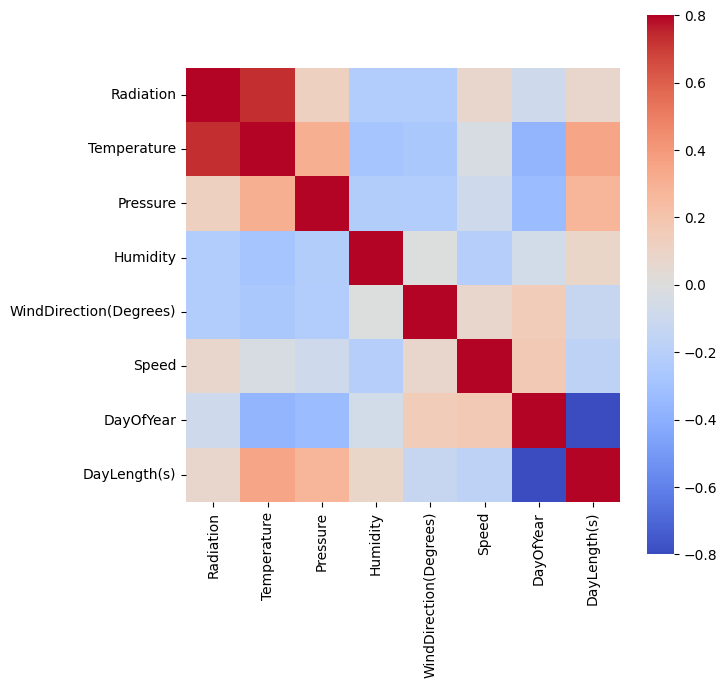

In [ ]:
# corrmat = dataset.drop(['TimeOfDay(m)', 'TimeOfDay(s)', 'MonthOfYear', 'WeekOfYear'], inplace=False, axis=1)
corrmat = dataset.drop(['TimeOfDay(h)', 'TimeOfDay(m)', 'TimeOfDay(s)', 'UNIXTime', 'MonthOfYear', 'WeekOfYear'], inplace=False, axis=1)

corrmat = corrmat.corr()
f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(corrmat, vmin=-.8, vmax=.8, square=True, cmap = 'coolwarm')
plt.show()

The correlation heatmap confirms the relationships suggested in the previous sections. It also suggests that the day of year will have a significantly weaker influence on solar irradiance compared to temperature.

## **Separating the Independent and Dependent Variables**
All recorded meteorological variables, except solar irradiance, were included in the independent variables. 'DayOfYear' and 'TimeOfDay(s)' were selected to represent date and time. This would ensure no problems were encountered if predictions for another year were to be made.

Solar Irradiance was of course set as the independent variable.

In [12]:
X = dataset[['Temperature','TimeOfDay(h)', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed', 'DayOfYear', 'TimeOfDay(s)']]
y = dataset['Radiation']

## **Splitting the Dataset**
The dataset was subsequently split into a training and test set, with an 80%, 20% split respectively.

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## **Feature Selection**
Although linear regressors can be used to estimate the importance of different features, it was felt that in this situation, with relatively nonlinear data, that this method would not be suitable. Fortunately, sci-kit learn's decision tree based regressors contain a feature importance attribute. This attribute was used to perform a backwards elimination procedure, where the least important feature of the regressor was repeatedly removed and the r<sup>2</sup> scores, from cross validation, of each model were recorded.

In [14]:
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.model_selection import cross_val_score
regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(X_train, y_train)
feature_importances = regressor.feature_importances_

X_train_opt = X_train.copy()
removed_columns = pd.DataFrame()
models = []
r2s_opt = []

for i in range(0,5):
    least_important = np.argmin(feature_importances)
    removed_columns = removed_columns.append(X_train_opt.pop(X_train_opt.columns[least_important]))
    regressor.fit(X_train_opt, y_train)
    feature_importances = regressor.feature_importances_
    accuracies = cross_val_score(estimator = regressor,
                                 X = X_train_opt,
                                 y = y_train, cv = 5,
                                 scoring = 'r2')
    r2s_opt = np.append(r2s_opt, accuracies.mean())
    models = np.append(models, ", ".join(list(X_train_opt)))
    
feature_selection = pd.DataFrame({'Features':models,'r2 Score':r2s_opt})
feature_selection.head()

<ipython-input-14-4f19f2685f48>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  removed_columns = removed_columns.append(X_train_opt.pop(X_train_opt.columns[least_important]))
<ipython-input-14-4f19f2685f48>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  removed_columns = removed_columns.append(X_train_opt.pop(X_train_opt.columns[least_important]))
<ipython-input-14-4f19f2685f48>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  removed_columns = removed_columns.append(X_train_opt.pop(X_train_opt.columns[least_important]))
<ipython-input-14-4f19f2685f48>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  removed_columns = removed_co

,Features,r2 Score
0,"Temperature, Pressure, Humidity, WindDirection...",0.930873
1,"Temperature, Pressure, Humidity, WindDirection...",0.932632
2,"Temperature, Humidity, WindDirection(Degrees),...",0.930941
3,"Temperature, Humidity, DayOfYear, TimeOfDay(s)",0.934026
4,"Temperature, DayOfYear, TimeOfDay(s)",0.933096


From the dataframe output, it can be seen that model performance stays relatively constant until 'DayOfYear' is removed, leaving 'Temperature' and 'TimeOfDay(s)' as the only features. Without performing any parameter tuning it appears that the random forest regressor, fit to 'Temperature', 'TimeOfDay(s)' and 'DayOfYear' is able to acheive a r<sup>2</sup> score as high as 0.93.

## **Chosing Best Regressor**
LazyRegressor trains and predict all the models. Opting for best model.

In [ ]:
!pip install lazypredict
from lazypredict.Supervised import LazyRegressor


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from lazypredict.Supervised import LazyRegressor

regres = LazyRegressor(verbose = 0, ignore_warnings = True, custom_metric = None)

models, predictions = regres.fit(X_train_best, X_test_best, y_train, y_test)


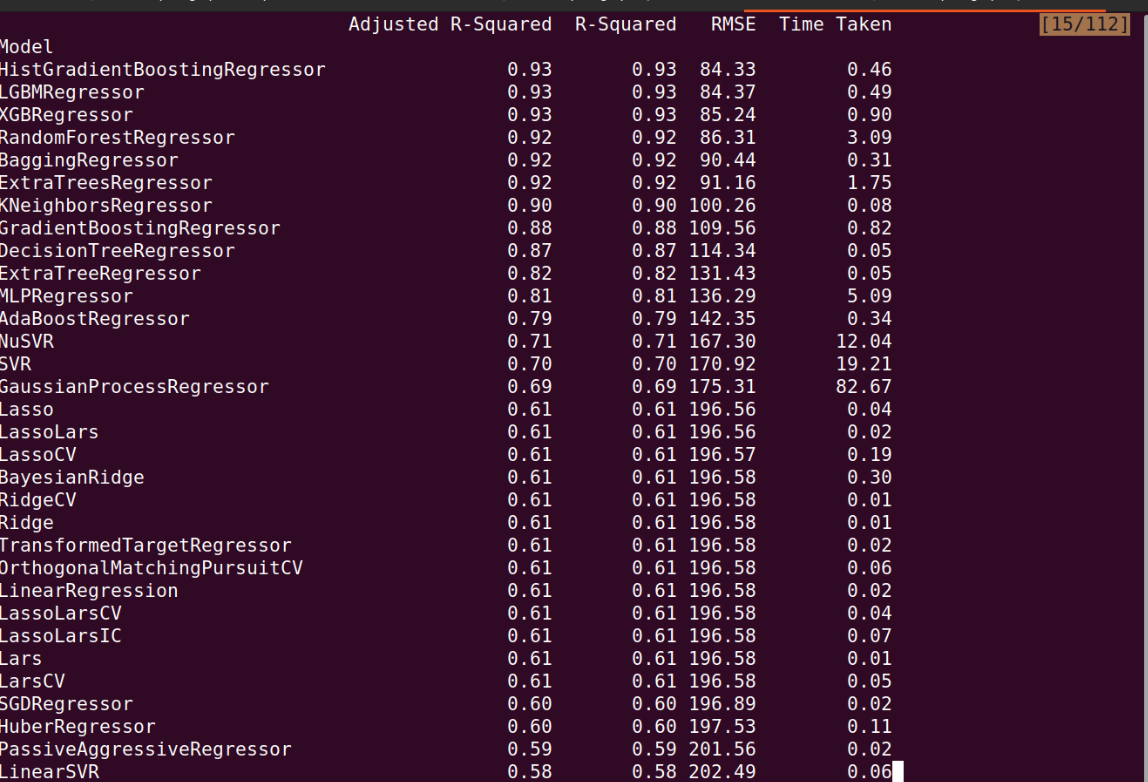

Above mentioned code snippet was executed on a seperate machine beacause of the high computational power and compatability issues. Results are copied and pasted there.


## **Best model**
LazyRegressor predicted HistGradientBoostingRegressor

In [ ]:
X_train_best = X_train[['Temperature', 'DayOfYear', 'TimeOfDay(s)','Humidity']]
X_test_best = X_test[['Temperature', 'DayOfYear', 'TimeOfDay(s)','Humidity']]
regressor = HistGradientBoostingRegressor(max_leaf_nodes=None)
regressor.fit(X_train_best, y_train)

HistGradientBoostingRegressor(max_leaf_nodes=None)

## **Cross Validation**
Cross validation, with a greater number of folds, again shows an r<sup>2</sup> score of 0.93.

In [ ]:
accuracies = cross_val_score(estimator = regressor, X = X_train_best,y = y_train, cv = 10, scoring = 'r2')
accuracy = accuracies.mean()
print('r2 = {}'.format(accuracy))

r2 = 0.9351091762112181


## **Predicting the Test Set**
The trained regressor is the used to predict and test set data, which was not involved in the training process. Explained variance, mean squared error and r<sup>2</sup> scores were output to evaluate the accuracy of the models predictions.

In [ ]:
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
y_pred = regressor.predict(X_test_best)
explained_variance_score = explained_variance_score(y_test, y_pred)
mean_squared_error = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('explained variance = {}'.format(explained_variance_score))
print('mse = {}'.format(mean_squared_error))
print('r2 = {}'.format(r_squared))

explained variance = 0.9404348156400987
mse = 6144.620936110592
r2 = 0.9403897945834927


The performance acheived when estimating the test set is very close to that found from cross validation, implying that the model is not overfit.

## **Visualising the Model**
In order to visualise the model, predictions were made for the entire dataset and an interactive plot created using the 'bokeh' library.

In [ ]:
# Predicting for whole dataset
dataset['y_pred'] = regressor.predict(dataset[['Temperature', 'DayOfYear', 'TimeOfDay(s)','Humidity']])

# Create Interactive Plot Using Bokeh
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import Range1d
output_notebook() 

p = figure(plot_width=800, 
           plot_height=400,
           title="Solar Irradiance Predictions",
           x_axis_label='Date and Time',
           y_axis_label='Solar Irradiance',
           x_axis_type="datetime")
p.x_range = Range1d(dataset.index[0], dataset.index[600])
p.y_range = Range1d(-100, 1800, bounds=(-100, 1800))
p.line(dataset.index, dataset['Radiation'], legend='Observed Solar Irradiance', line_width=1)
p.line(dataset.index, dataset['y_pred'], legend='Predicted Solar Irradiance', line_width=1, line_color="red")

show(p, notebook_handle = True)

From the plot it can be see that the predictions closely match the observations.

## **Power Generation implemented**


In [ ]:
power = [] #predicted power generated in watts
A = 100 #m-sq 
e = 0.2 #percentage
radiations = y_pred # watts per m-sq
for r in radiations:
    power.append((A*e*r, r))


## **Generated Power against Radiation predicted**


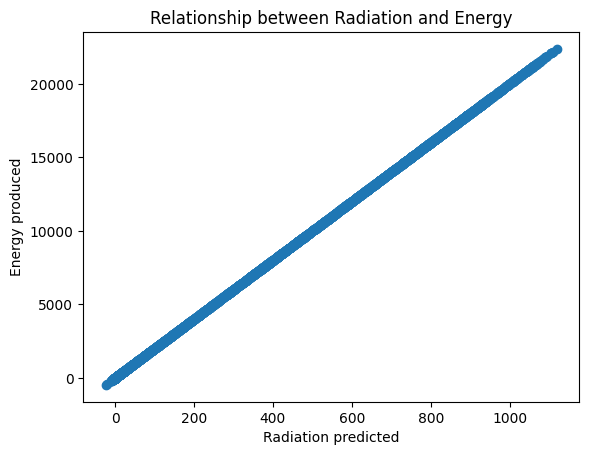

In [ ]:
x = [i[1] for i in power] #radiation
y = [i[0] for i in power] #energy

plt.scatter(x, y)
plt.xlabel('Radiation predicted')
plt.ylabel('Energy produced')
plt.title('Relationship between Radiation and Energy')
plt.show()

## **Conclusion**
The variables most relevant to the prediction of solar irradiance were found to be temperature, time of day, and day of year. Training a HistGradientBoostingRegressor with these three variables (with units of farenheit, seconds, and days respectively) produced a model that acheived a mean r<sup>2</sup> score of 0.93 when cross validation was performed. When comparing predictions to a test set, again, an r<sup>2</sup> score of approximately 0.93 was obtained.

It may be possible to tune the HistGradientBoostingRegressor to obtain an even higher r<sup>2</sup> score but realisitically the model produced is unlikely to be any better at solar irradiance prediction, it will just fit the observations of one particular year extremely well. To create a more useful model, the regressor should be trained on data recorded over several years.

From the visualization of predicted energy against solar radiations, as, expected, there is a linear relation between the two variables as the radiations increase, the energy prediction increases.
